Cab booking system is the process where renting a cab is automated through an app throughout a city. Using this app people can book a cab from one location to another location. Being a cab booking app company, exploiting an understanding of cab supply and demand could increase the efficiency of their service and enhance user experience by minimizing waiting time.

Objective of this project is to combine historical usage pattern along with the open data sources like weather data to forecast cab booking demand in a city.

#### **Data Fields**

* datetime - hourly date + timestamp  
* season -  spring, summer,autumn,winter 
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather - Clear , Cloudy, Light Rain, Heavy
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* Total_booking - number of total booking

# Libraries installation & dataset loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore")

In [168]:
# x is independent features 
# y is dependent feature(label)

In [169]:
X_train = pd.read_csv(r"D:\NIT\mid program project_1_data\train.csv")
y_train = pd.read_csv(r"D:\NIT\mid program project_1_data\train_label.csv", header = None, names=["Total_booking"])
X_test = pd.read_csv(r"D:\NIT\mid program project_1_data\test.csv")
y_test = pd.read_csv(r"D:\NIT\mid program project_1_data\test_label.csv", header = None)

In [170]:
#X_train['Total_booking'] = y_train[0]
#X_train.head()
df = pd.concat([X_train , y_train], axis=1) #df is training data
df_copy =df.copy()

# Data Preprocessing

In [171]:
df.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object

In [172]:
df.isna().any()

datetime         False
season           False
holiday          False
workingday       False
weather          False
temp             False
atemp            False
humidity         False
windspeed        False
Total_booking    False
dtype: bool

In [128]:
df['season'] = df['season'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   datetime       8708 non-null   object  
 1   season         8708 non-null   category
 2   holiday        8708 non-null   category
 3   workingday     8708 non-null   category
 4   weather        8708 non-null   category
 5   temp           8708 non-null   float64 
 6   atemp          8708 non-null   float64 
 7   humidity       8708 non-null   int64   
 8   windspeed      8708 non-null   float64 
 9   Total_booking  8708 non-null   int64   
dtypes: category(4), float64(3), int64(2), object(1)
memory usage: 443.0+ KB


In [173]:
print("EDA on Training Set")
print("*" * 50)

print("Features/Columns : ", df.columns)
print("Number of Features/Columns: " , len(df.columns))
#print("Number of Features/Columns: " , len(df)) - wrong statement
print("Number of Rows: ", len(df))
print("Datatypes: ", df.dtypes)
print("Contains empty cell :", df.isnull().values.any())
print("Total empty cells by columns: ", df.isnull().sum())

EDA on Training Set
**************************************************
Features/Columns :  Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_booking'],
      dtype='object')
Number of Features/Columns:  10
Number of Rows:  8708
Datatypes:  datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object
Contains empty cell : False
Total empty cells by columns:  datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
dtype: int64


# Feature Engineering

In [174]:
import calendar
from datetime import datetime
df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0])
df["weekday"] = df.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
df["month"] = df.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [175]:
df["hour"] = df["hour"].apply(lambda x: x.zfill(2))

In [176]:
df = df.drop(["datetime"],axis=1)

In [177]:
print("training Set after transformation")
df.head(10)

training Set after transformation


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,04,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,09,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
5,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
6,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395,10/6/2012,09,Saturday,October
7,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5,9/10/2012,04,Monday,September
8,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9,7/14/2012,04,Saturday,July
9,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78,2/6/2011,18,Sunday,February


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         8708 non-null   object 
 1   holiday        8708 non-null   int64  
 2   workingday     8708 non-null   int64  
 3   weather        8708 non-null   object 
 4   temp           8708 non-null   float64
 5   atemp          8708 non-null   float64
 6   humidity       8708 non-null   int64  
 7   windspeed      8708 non-null   float64
 8   Total_booking  8708 non-null   int64  
 9   date           8708 non-null   object 
 10  hour           8708 non-null   object 
 11  weekday        8708 non-null   object 
 12  month          8708 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 884.5+ KB


# Outlier Ananlysis

a. Plot Box plots across various features like season, hour of the day, working_day, etc to see if there are any Outlier and note down your inference

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Total_booking'),
 Text(0.5, 1.0, 'Box Plot On Total_booking Across Working Day')]

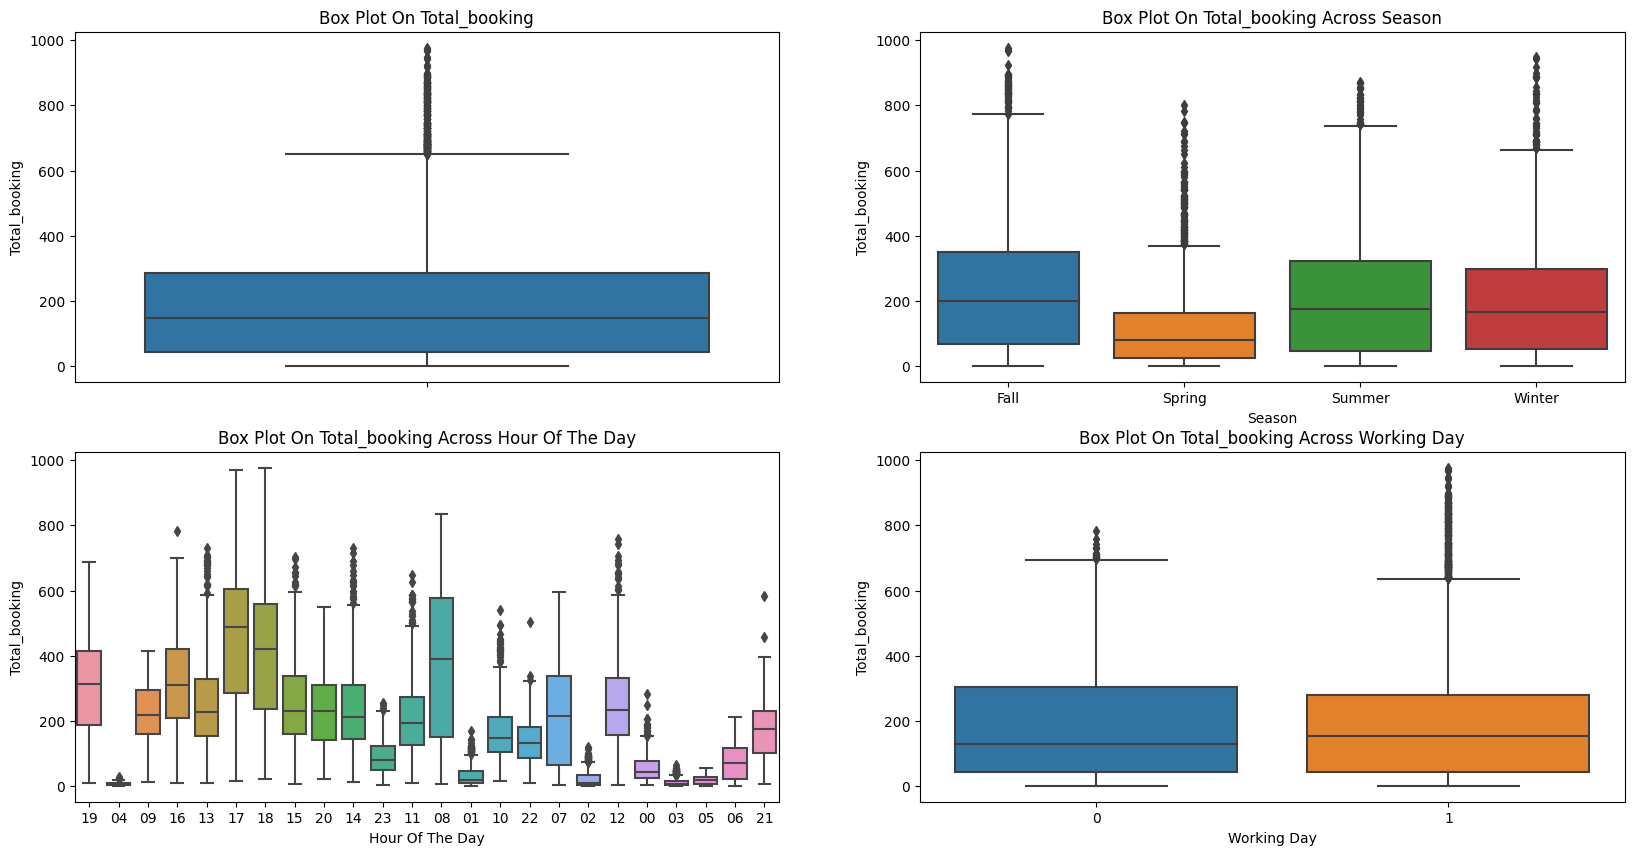

In [135]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=df,y="Total_booking",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="Total_booking",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="Total_booking",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="Total_booking",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Total_booking',title="Box Plot On Total_booking")
axes[0][1].set(xlabel='Season', ylabel='Total_booking',title="Box Plot On Total_booking Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Total_booking',title="Box Plot On Total_booking Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Total_booking',title="Box Plot On Total_booking Across Working Day")

b. Remove the outliers present in the dataset

In [179]:
df = df[np.abs(df["Total_booking"]-df["Total_booking"].mean())<=(3*df["Total_booking"].std())]

# Correlation Analysis

Plot a correlation plot between "total booking" and ["temp", "atemp", "humidity", "windspeed"]

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "Total_booking" and ["temp","atemp","humidity","windspeed"].

 - temp and humidity features has got positive and negative correlation
   with Total_booking respectively.Although the correlation between them are not
   very prominent still the Total_booking variable has got little dependency on
   "temp" and "humidity".
 - windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "Total_booking"
 - "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.

Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "Total_booking" vs "temp", "humidity", "windspeed".

<AxesSubplot: >

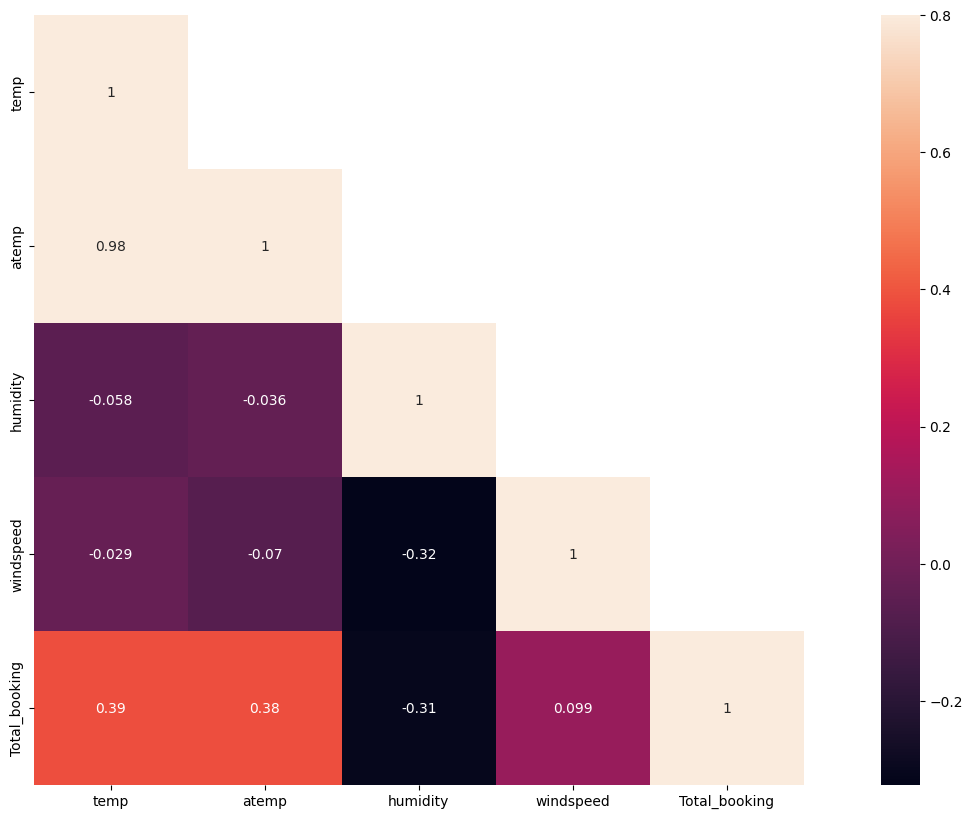

In [180]:
corrMatt = df[["temp","atemp","humidity","windspeed","Total_booking"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot: xlabel='atemp', ylabel='Total_booking'>

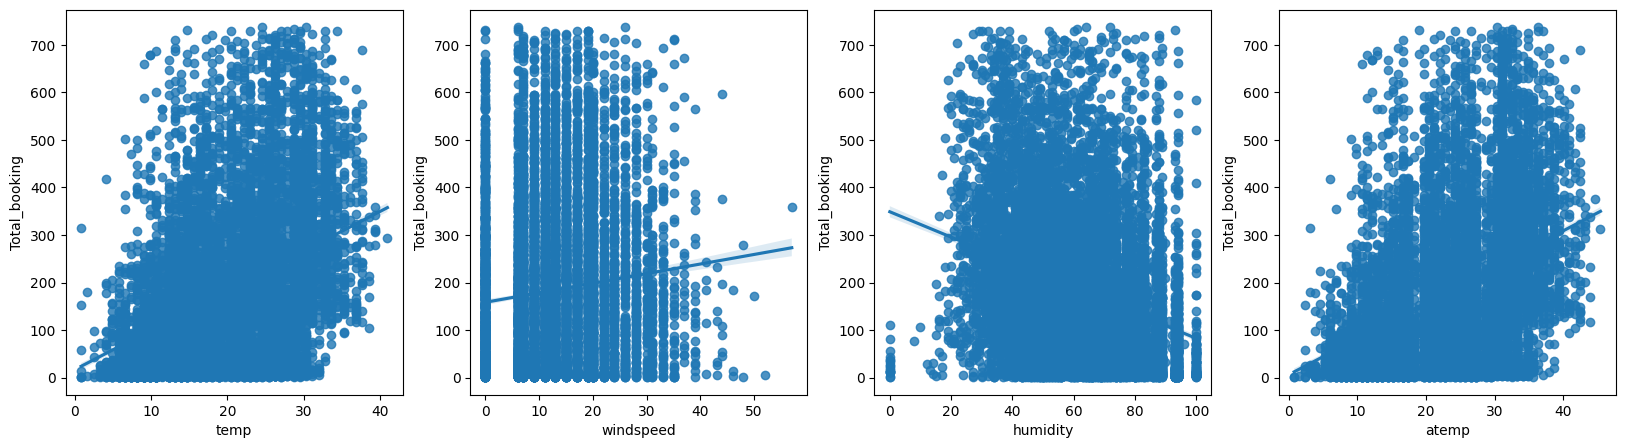

In [181]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20, 5)
sns.regplot(x="temp", y="Total_booking", data=df,ax=ax1)
sns.regplot(x="windspeed", y="Total_booking", data=df,ax=ax2)
sns.regplot(x="humidity", y="Total_booking", data=df,ax=ax3)
sns.regplot(x="atemp", y="Total_booking", data=df,ax=ax4)

# Data Visualization

a. Visualize distribution of data: total_booking column and plot the probability distribution plot for the column as well

As it is visible from the below figures that "Total_booking" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "Total_booking" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

[Text(0.5, 1.0, 'Theoretical quantiles')]

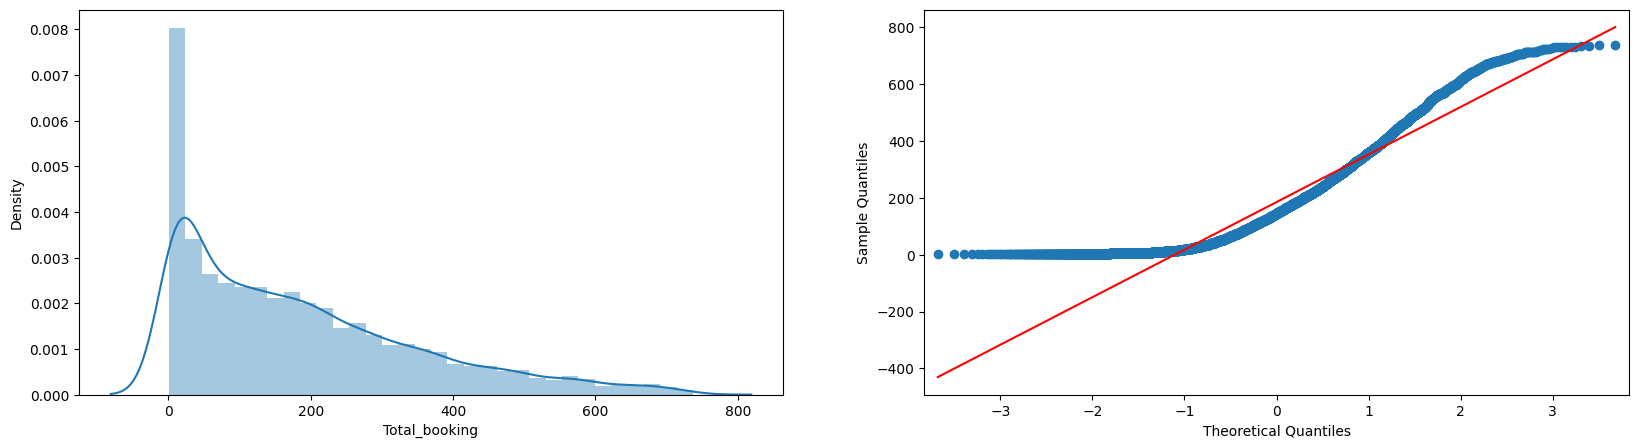

In [182]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['Total_booking'], ax=ax1)
ax.set(title="Distribution after log of Total_booking")
qqplot(df['Total_booking'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

In [183]:
import math
df['Total_booking'] = df['Total_booking'].transform(lambda x: math.log(x))

[Text(0.5, 1.0, 'Theoretical quantiles')]

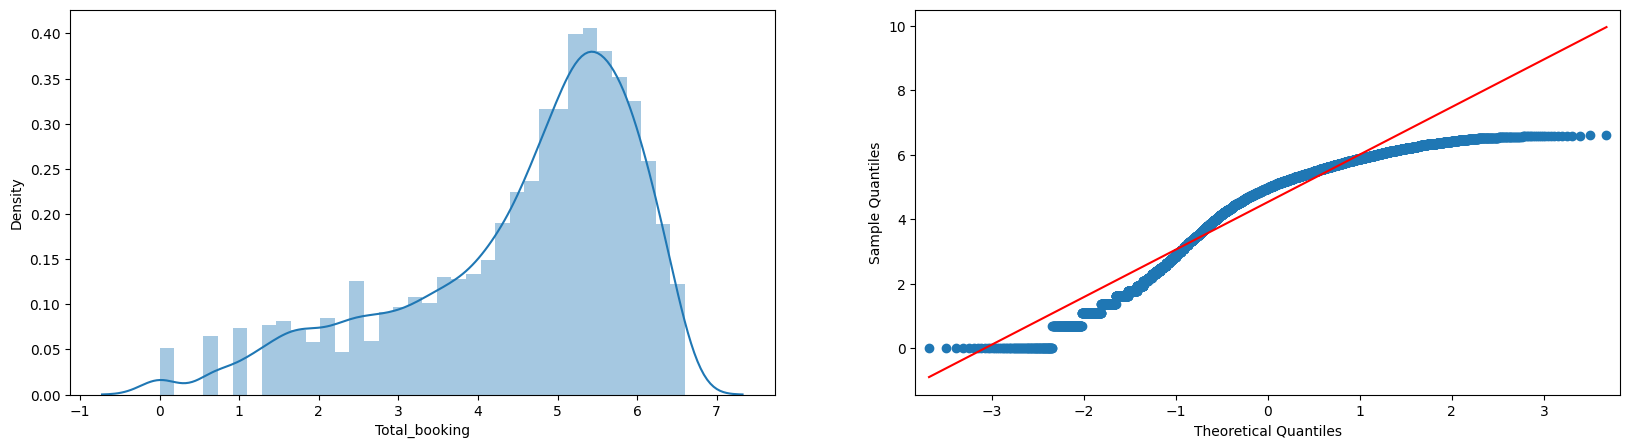

In [141]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(df['Total_booking'], ax=ax1)
ax.set(title="Distribution after log of Total_booking")
qqplot(df['Total_booking'], line='s', ax=ax2)
ax.set(title="Theoretical quantiles")

b. Visualize total_booking vs (Month, Season, Hour, Weekday, Usertype)

In [142]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,6.222576,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,1.609438,9/5/2012,04,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,4.934474,1/13/2011,09,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,5.342334,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,5.214936,9/13/2011,13,Tuesday,September


**Combine Train And Test**

In [143]:
data = df_copy.append(X_test)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [144]:
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
10881,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,NaN
10882,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,NaN
10883,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,NaN
10884,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,NaN
10885,7/18/2012 16:00,Fall,0,1,Clear + Few clouds,30.34,34.850,66,16.9979,NaN


In [145]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("/")[2])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%m/%d/%Y").month)

In [146]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,year,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504.0,5/2/2012,19,2012,2,5
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5.0,9/5/2012,4,2012,2,9
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139.0,1/13/2011,9,2011,3,1
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209.0,11/18/2011,16,2011,4,11
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184.0,9/13/2011,13,2011,1,9


# Preprocessing

In [147]:
from sklearn.preprocessing import minmax_scale
data[['atemp','humidity','temp','windspeed']] = minmax_scale(data[['atemp','humidity','temp','windspeed']])

In [148]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,date,hour,year,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,0.530612,0.559347,0.77,0.298225,504.0,5/2/2012,19,2012,2,5
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,0.693878,0.728829,0.79,0.333373,5.0,9/5/2012,4,2012,2,9
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,0.122449,0.118581,0.50,0.386035,139.0,1/13/2011,9,2011,3,1
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,0.326531,0.355856,0.29,0.157870,209.0,11/18/2011,16,2011,4,11
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,0.734694,0.728829,0.51,0.333373,184.0,9/13/2011,13,2011,1,9


In [149]:
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)

In [150]:
data_dummy.head()

,datetime,temp,atemp,humidity,windspeed,Total_booking,date,year,season_Spring,season_Summer,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012 19:00,0.530612,0.559347,0.77,0.298225,504.0,5/2/2012,2012,0,1,...,0,1,0,0,0,0,1,0,0,0
1,9/5/2012 4:00,0.693878,0.728829,0.79,0.333373,5.0,9/5/2012,2012,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1/13/2011 9:00,0.122449,0.118581,0.50,0.386035,139.0,1/13/2011,2011,1,0,...,0,0,1,0,0,0,1,0,0,0
3,11/18/2011 16:00,0.326531,0.355856,0.29,0.157870,209.0,11/18/2011,2011,0,0,...,0,0,0,1,0,0,1,0,0,0
4,9/13/2011 13:00,0.734694,0.728829,0.51,0.333373,184.0,9/13/2011,2011,0,0,...,1,0,0,0,0,0,1,0,0,0


In [151]:
data_dummy = data_dummy.drop(["atemp"],axis=1)

In [152]:
traindata = data_dummy[pd.notnull(data['Total_booking'])]
testdata = data_dummy[~pd.notnull(data['Total_booking'])]
traindata.reset_index(drop=True)

,datetime,temp,humidity,windspeed,Total_booking,date,year,season_Spring,season_Summer,season_Winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,5/2/2012 19:00,0.530612,0.77,0.298225,504.0,5/2/2012,2012,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,9/5/2012 4:00,0.693878,0.79,0.333373,5.0,9/5/2012,2012,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1/13/2011 9:00,0.122449,0.50,0.386035,139.0,1/13/2011,2011,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,11/18/2011 16:00,0.326531,0.29,0.157870,209.0,11/18/2011,2011,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,9/13/2011 13:00,0.734694,0.51,0.333373,184.0,9/13/2011,2011,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,0.081633,0.54,0.105325,13.0,1/16/2012,2012,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8704,11/10/2011 1:00,0.387755,0.87,0.000000,11.0,11/10/2011,2011,0,0,1,...,0,0,1,0,0,0,1,0,0,1
8705,4/12/2011 3:00,0.571429,0.56,0.157870,1.0,4/12/2011,2011,0,1,0,...,1,0,0,0,0,0,1,0,0,1
8706,11/7/2012 1:00,0.265306,0.61,0.298225,92.0,11/7/2012,2012,0,0,1,...,0,1,0,0,0,0,1,0,0,1


**Dropping  Unncessary Variables**

In [153]:
X_new_train = traindata.drop(["Total_booking","datetime","date"],axis=1)#X_new_train IS NORMALIZED X_train
X_new_test = testdata.drop(["Total_booking","datetime","date"],axis=1)#X_new_test is NORMALIZED X_test

In [154]:
X_new_train.head()

,temp,humidity,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
0,0.530612,0.77,0.298225,2012,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0.693878,0.79,0.333373,2012,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.122449,0.50,0.386035,2011,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.326531,0.29,0.157870,2011,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.734694,0.51,0.333373,2011,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [155]:
X_new_test.head()

,temp,humidity,windspeed,year,season_Spring,season_Summer,season_Winter,month_2,month_3,month_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_ Heavy Rain + Thunderstorm,"weather_ Light Snow, Light Rain",weather_ Mist + Cloudy
8708,0.510204,0.48,0.614083,2012,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
8709,0.571429,0.64,0.122840,2012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8710,0.265306,1.00,0.491243,2011,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8711,0.612245,0.83,0.000000,2011,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8712,0.612245,0.43,0.421065,2012,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Model building

In [156]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_log_error,make_scorer # for regression
from sklearn import model_selection

In [157]:
def rmsle(y_test,test_pred):
    return (np.sqrt(mean_squared_log_error(y_test,test_pred)))

In [158]:
rmsle_= make_scorer(rmsle)

In [159]:
models=[RandomForestRegressor(),AdaBoostRegressor(),SVR(),KNeighborsRegressor(),BaggingRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','SVR','KNeighborsRegressor',"BaggingRegressor"]
rmsle=[]
d={}
def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0, shuffle = True)
    predicted = model_selection.cross_val_score(model, X_new_train, np.log(y_train), cv=kfold, scoring=rmsle_)
    rmsle.append(predicted.mean())

In [162]:
for model in models:
    test_algorithms(model)
d={'Modelling Algo':model_names,'CROSS VAL RMSLE':rmsle} 

In [163]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,CROSS VAL RMSLE
0,RandomForestRegressor,0.130506
1,AdaBoostRegressor,0.252844
2,SVR,0.375278
3,KNeighborsRegressor,0.188200
4,BaggingRegressor,0.135992


In [ ]:
import seaborn as sns
sns.factorplot(y='Modelling Algo',x='CROSS VAL RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

In [ ]:
sns.factorplot(x='Modelling Algo',y='CROSS VAL RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [165]:
clf=RandomForestRegressor()
clf.fit(X_new_train,np.log(y_train))
test_pred=clf.predict(X_new_test)

In [166]:
print ("RMSLE Value For RandomForestRegressor : ",np.sqrt(mean_squared_log_error(np.log(y_test),test_pred)))

RMSLE Value For RandomForestRegressor :  0.14050116275537997


####  NOW RANDOM FORETS REGRESSOR GIVES THE LEAST RMSLE.